In [4]:
import numpy as np
import pandas as pd
#最大表示行数の指定（ここでは50行を指定）
pd.set_option('display.max_rows', 50)

from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn.metrics import f1_score
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import StandardScaler

import seaborn as sns
sns.set(font='Yu Gothic')
import matplotlib.pyplot as plt
%matplotlib inline

from IPython.core.display import display, HTML
display(HTML("<style>.container { width:90% !important; }</style>"))

In [5]:
def plot_confusion_matrix(test_y,pred_y,class_names,normalize=False, fontsize=32):
    cm = confusion_matrix(test_y,pred_y)
    # classes = class_names[unique_labels(test_y,pred_y)]
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=0)
    
    if len(class_names) <= 3:
        fig, ax = plt.subplots(figsize=(8, 4))
    else:
        fig, ax = plt.subplots(figsize=(16, 8))

    im = ax.imshow(cm, interpolation='nearest', cmap=plt.cm.Blues)
    ax.figure.colorbar(im, ax=ax)
    ax.set(xticks=np.arange(cm.shape[1]),
           yticks=np.arange(cm.shape[0]),
           xticklabels=class_names,
           yticklabels=class_names,
           ylabel='True label\n',
           xlabel='\nPredicted label')
    fmt = '.2f' if normalize else 'd'
    for i in range(cm.shape[0]):
        for j in range(cm.shape[1]):
            ax.text(j,
                    i,
                    format(cm[i, j], fmt),
                    ha="center",
                    va="center",
                    color="red", fontsize=fontsize)
    fig.tight_layout()
    return ax

In [6]:
def rename(pattern, kind, hold_position, name):
    if name == "安部":
        file_path = "pattern" + pattern + "/" + name + "分類_" + kind + "_" + hold_position + "_pattern" + pattern + ".npy"
    elif name == "関口":
        file_path = "pattern" + pattern + "/" + kind + "_" + hold_position + "_" + name + "分類.npy"
    return file_path

In [7]:
def pattern1Concat(pattern, kind, hold_position, name):
    pattern = str(pattern)
    if kind == "train":
        label = np.load("../../Data/センサ別npyファイル/train/train_Bag/train_Bag_Label.npy")[:, 0].reshape([-1, 1])
        label = np.delete(label, 120845, 0)
    else:
        label = np.load("../../Data/センサ別npyファイル/validation/validation_Bag/validation_Bag_Label.npy")[:, 0].reshape([-1, 1])
    
    file_path = rename(pattern, kind, hold_position, name)
    predict = np.argmax(np.load(file_path), axis=1).reshape([-1, 1])
    
    if kind == "train" and name == "安部":
        predict = np.delete(predict, 120845, 0)
    if name == "関口":
        predict += 1
    
    print(label.shape, predict.shape, np.unique(predict))
    result = np.concatenate([label, predict], axis=1).astype(np.int32)
    result = pd.DataFrame(result, columns=["label", name + "predict"])
    return result

In [3]:
def pattern2Concat(pattern, kind, hold_position, name):
    pattern = str(pattern)
    pattern_data = np.load("pattern" + pattern + "/" + kind + "_pattern" + pattern + ".npy").reshape([-1, 1])
    if kind == "train":
        label = np.load("../../Data/センサ別npyファイル/train/train_Bag/train_Bag_Label.npy")[:, 0].reshape([-1, 1])
        label = np.delete(label, 120845, 0)
    else:
        label = np.load("../../Data/センサ別npyファイル/validation/validation_Bag/validation_Bag_Label.npy")[:, 0].reshape([-1, 1])
    
    file_path = rename(pattern, kind, hold_position, name)
    predict = np.argmax(np.load(file_path), axis=1).reshape([-1, 1]) + 1
    
    if kind == "train" and name == "安部":
        predict = np.delete(predict, 120845, 0)
    
    print(pattern_data.shape, label.shape, predict.shape)
    result = np.concatenate([pattern_data, label, predict], axis=1).astype(np.int32)
    result = pd.DataFrame(result, columns=["pattern", "label", name + "predict"])
    return result

# validationすべてに対する結果を出す

In [35]:
hold_positions = ["Bag", "Hips", "Torso", "Hand"]

names = ["安部", "関口"]
patterns = []

for name in names:
    tmp = pattern1Concat(1, "validation", hold_positions[0], name)
    for hold_position in hold_positions[1:]:
        tmp = pd.concat([tmp, pattern1Concat(1, "validation", hold_position, name)], axis=0)
    print("tmp:", tmp.shape)
    patterns.append(tmp)
patterns[0].shape

(28685, 1) (28685, 1) [1 2 3 4 5 6 7]
(28685, 1) (28685, 1) [5]
(28685, 1) (28685, 1) [1 2 3 4 5 6 7]
(28685, 1) (28685, 1) [1 2 3 4 5 6 7]
tmp: (114740, 2)
(28685, 1) (28685, 1) [1 2 3 4 5 6 7 8]
(28685, 1) (28685, 1) [1 2 3 4 5 6 7 8]
(28685, 1) (28685, 1) [1 2 3 4 5 6 7 8]
(28685, 1) (28685, 1) [1 2 3 4 5 6 7 8]
tmp: (114740, 2)


(114740, 2)

安部 0.2914710909799316
関口 0.5839138830838936


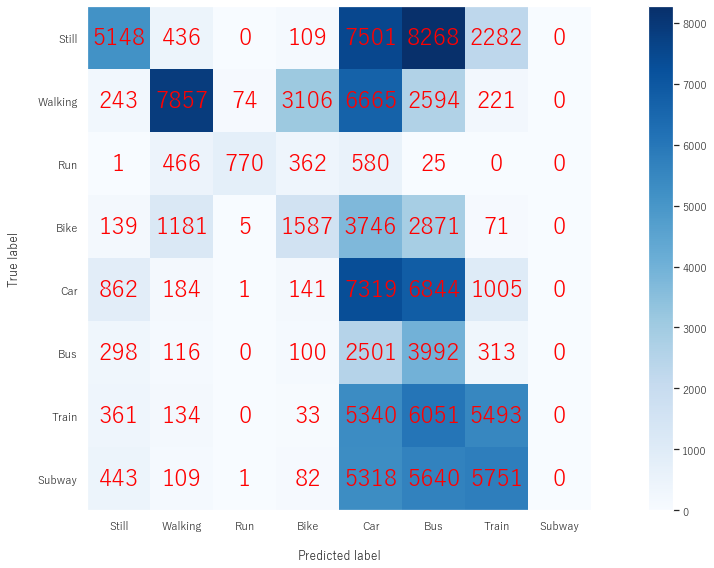

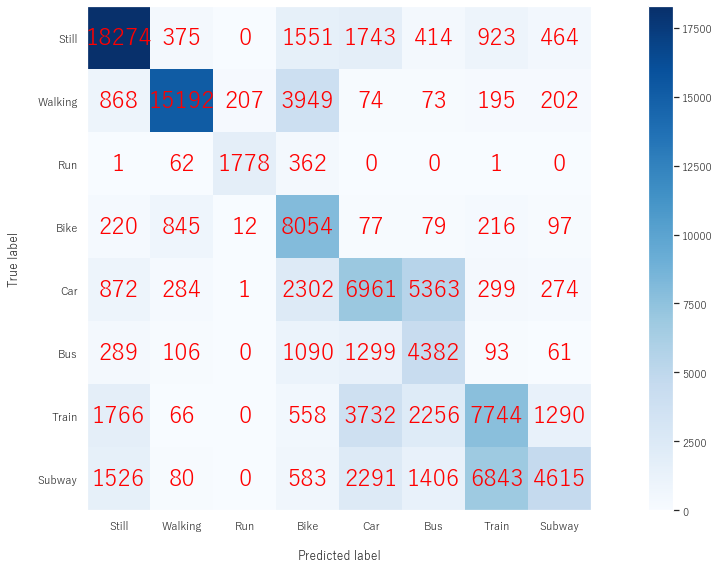

In [36]:
class_names = ["Still", "Walking", "Run", "Bike", "Car", "Bus", "Train", "Subway"]

for pattern, name in zip(patterns, names):
    plot_confusion_matrix(pattern['label'], pattern[name + "predict"], class_names, normalize=False, fontsize=24)
    plt.grid(False)

    f1 = f1_score(pattern['label'], pattern[name + "predict"], average="macro")
    print(name, f1)

# 保持位置ごと成績をチェック

In [9]:
names = ["安部", "関口"]
patterns = []

for name in names:
    patterns.append(pattern1Concat(1, "validation", "Bag", name))

(28685, 1) (28685, 1) [1 2 3 4 5 6 7]
(28685, 1) (28685, 1) [1 2 3 4 5 6 7 8]


安部 0.42079951626647977
関口 0.5983502414064614


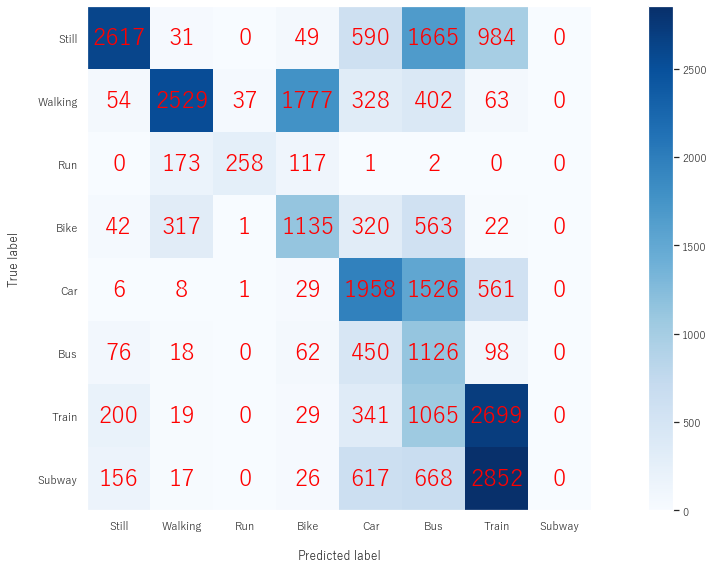

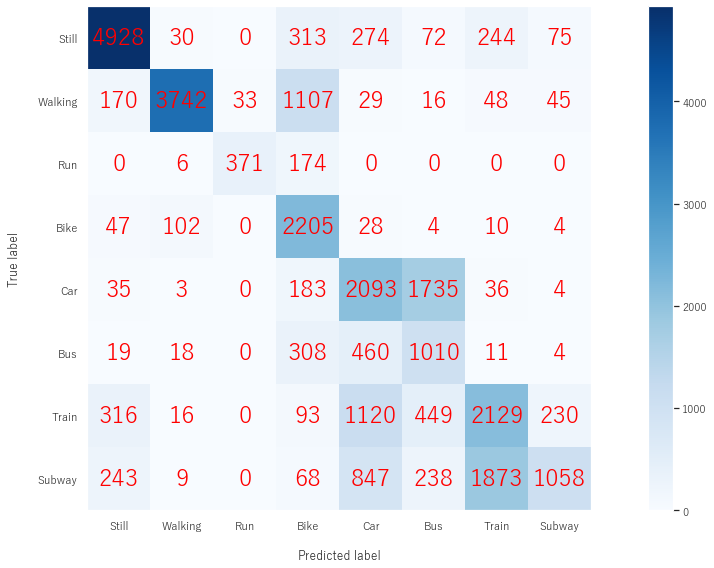

In [11]:
class_names = ["Still", "Walking", "Run", "Bike", "Car", "Bus", "Train", "Subway"]

for pattern, name in zip(patterns, names):
    plot_confusion_matrix(pattern['label'], pattern[name + "predict"], class_names, normalize=False, fontsize=24)
    plt.grid(False)

    f1 = f1_score(pattern['label'], pattern[name + "predict"], average="macro")
    print(name, f1)

## かんたんにロジスティック回帰で分類

In [12]:
from sklearn.linear_model import LogisticRegression

# パターン1トレーニングデータ読み込み

In [13]:
def logisticX_pattern1():
    x = []
    hold_positions = ["Bag", "Hips", "Torso", "Hand"]
        
    for hold_position in hold_positions:
        file_path = rename("1", "train", hold_position, names[0])
        xx = np.load(file_path).reshape([-1, 8])
        if names[0] == "安部":
            xx = np.delete(xx, 120845, 0)
        for name in names[1:]:
            file_path = rename("1", "train", hold_position, name)
            tmp = np.load(file_path).reshape([-1, 8])
            if name == "安部":
                tmp = np.delete(tmp, 120845, 0)
            xx = np.concatenate([xx, tmp], axis=1)
            print(xx.shape)
        x.append(xx)
            
    x = np.array(x)
    x = x.reshape([-1, 8])
    return x

In [14]:
x_train = logisticX_pattern1()
y_train_tmp = np.delete(np.load("../../Data/センサ別npyファイル/train/train_Bag/train_Bag_Label.npy")[:, 0].reshape([-1, 1]), 120845, 0)
y_train = np.concatenate([y_train_tmp, y_train_tmp, y_train_tmp, y_train_tmp], axis=0)
y_train = y_train.reshape([-1, 1])

x_train = x_train.reshape([-1, 8 * len(names)])
x_train.shape, y_train.shape

(195490, 16)
(195490, 16)
(195490, 16)
(195490, 16)


((781960, 16), (781960, 1))

In [15]:
lr = LogisticRegression() # ロジスティック回帰モデルのインスタンスを作成
lr.fit(x_train, y_train) # ロジスティック回帰モデルの重みを学習


C:\Users\Owner\Anaconda3\envs\GPU\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\Owner\Anaconda3\envs\GPU\lib\site-packages\sklearn\linear_model\_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [16]:
def logisticTest_pattern1():
    x = []
    hold_positions = ["Bag", "Hips", "Torso", "Hand"]
        
    for hold_position in hold_positions:
        file_path = rename("1", "validation", hold_position, names[0])
        xx = np.load(file_path).reshape([-1, 8])
        for name in names[1:]:
            file_path = rename("1", "validation", hold_position, name)
            tmp = np.load(file_path).reshape([-1, 8])
            xx = np.concatenate([xx, tmp], axis=1)
            print(xx.shape)
        x.append(xx)
            
    x = np.array(x)
    x = x.reshape([-1, 8])
    return x

In [17]:
x_test = logisticTest_pattern1()
y_test_tmp = np.load("../../Data/センサ別npyファイル/validation/validation_Bag/validation_Bag_Label.npy")[:, 0].reshape([-1, 1])
y_test = np.concatenate([y_test_tmp, y_test_tmp, y_test_tmp, y_test_tmp], axis=0)
y_test = y_test.reshape([-1, 1])
x_test = x_test.reshape([-1, 8 * len(names)])

x_test.shape, y_test.shape

(28685, 16)
(28685, 16)
(28685, 16)
(28685, 16)


((114740, 16), (114740, 1))

In [18]:
predict = lr.predict(x_test)
print(predict)

[4. 3. 3. ... 5. 5. 5.]


In [22]:
def plot_confusion_matrix(test_y,pred_y,class_names,normalize=False, fontsize=32):
    cm = (confusion_matrix(test_y,pred_y))
    # classes = class_names[unique_labels(test_y,pred_y)]
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=0)
    
    if len(class_names) <= 3:
        fig, ax = plt.subplots(figsize=(8, 4))
    else:
        fig, ax = plt.subplots(figsize=(16, 8))

    im = ax.imshow(cm, interpolation='nearest', cmap=plt.cm.Blues)
    ax.figure.colorbar(im, ax=ax)
    ax.set(xticks=np.arange(cm.shape[1]),
           yticks=np.arange(cm.shape[0]),
           xticklabels=class_names,
           yticklabels=class_names,
           ylabel='True label\n',
           xlabel='\nPredicted label')
    fmt = '.2f' if normalize else 'd'
    for i in range(cm.shape[0]):
        for j in range(cm.shape[1]):
            ax.text(j,
                    i,
                    format(cm[i, j], fmt),
                    ha="center",
                    va="center",
                    color="red", fontsize=fontsize)
    fig.tight_layout()
    return ax

(114740,)
アンサンブル結果 0.5887399690787226


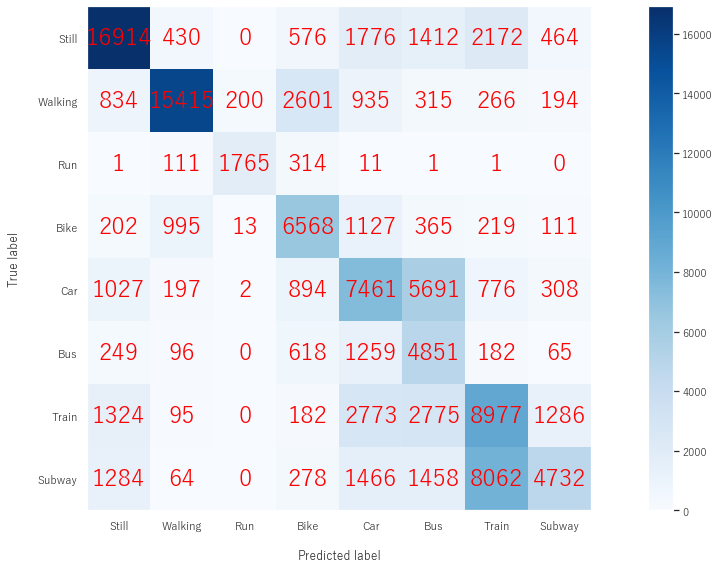

In [23]:
plot_confusion_matrix(y_test, predict, class_names, normalize=False, fontsize=24)
plt.grid(False)

f1 = f1_score(y_test, predict, average="macro")
print(predict.shape)
print("アンサンブル結果", f1)

Bag_アンサンブル結果 0.6135550395383533
Hips_アンサンブル結果 0.5971508512933259
Torso_アンサンブル結果 0.5972186034954035
Hand_アンサンブル結果 0.5445855989259409


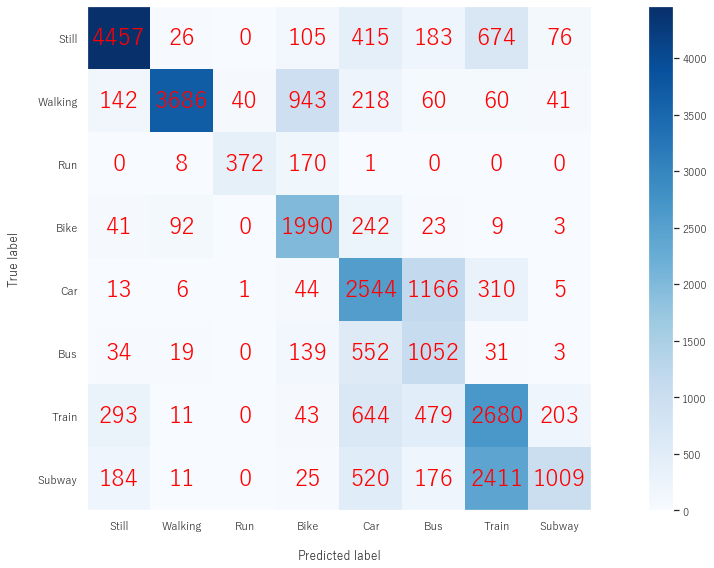

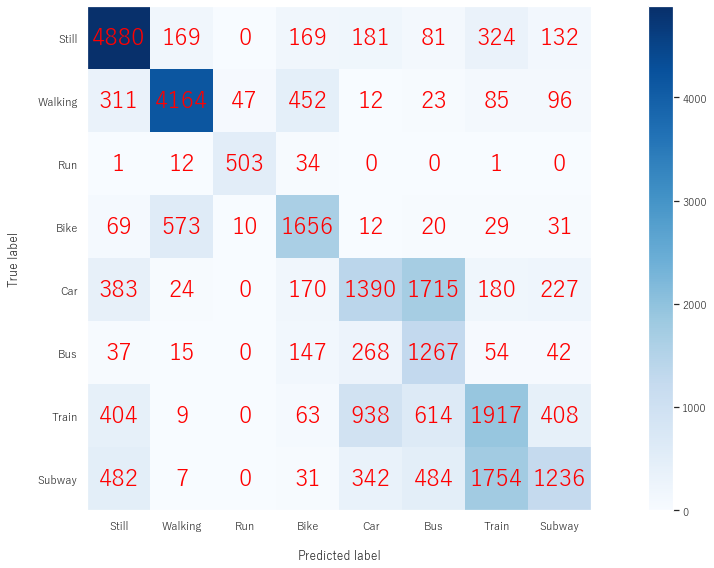

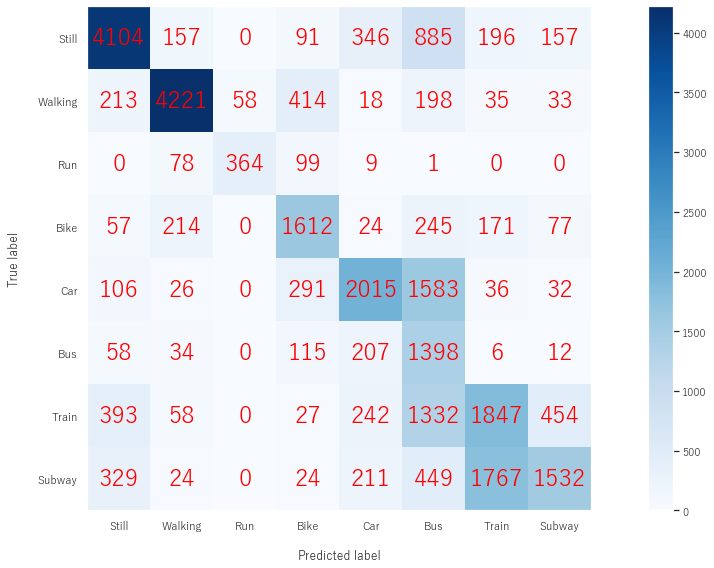

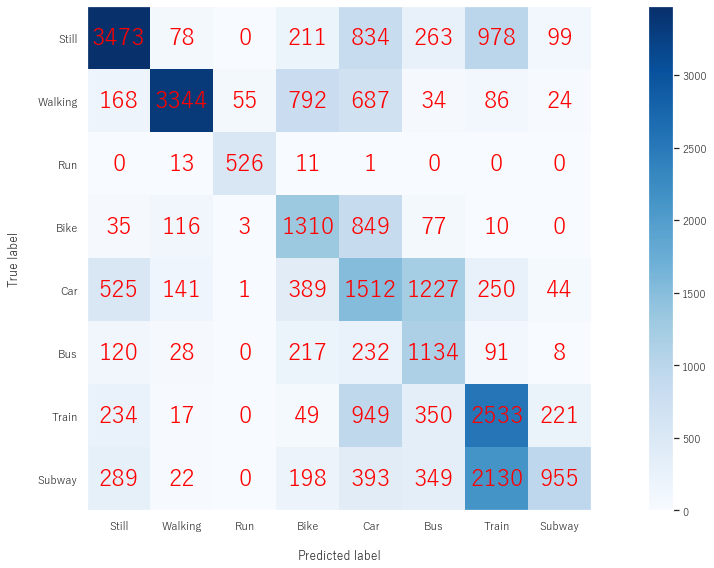

In [24]:
hold_positions = ["Bag", "Hips", "Torso", "Hand"]
for i in range(4):
    plot_confusion_matrix(y_test[y_test.shape[0]//4*i:y_test.shape[0]//4*(i+1)], predict[y_test.shape[0]//4*i:y_test.shape[0]//4*(i+1)], class_names, normalize=False, fontsize=24)
    plt.grid(False)

    f1 = f1_score(y_test[y_test.shape[0]//4*i:y_test.shape[0]//4*(i+1)], predict[y_test.shape[0]//4*i:y_test.shape[0]//4*(i+1)], average="macro")
    print(hold_positions[i] + "_アンサンブル結果", f1)